In [2]:
import pandas as pd

In [3]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [6]:
def years_to_date(yrs):
    return yrs*365

titanic["age"].apply(years_to_date)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [7]:
def get_age_group(age):
    if age < 2:
        return "infant"
    elif age < 12:
        return "chlid"
    elif age < 18:
        return "teen"
    elif age < 50:
        return "adult"
    else:
        return "senior"

In [8]:
titanic["age_group"] = titanic["age"].apply(get_age_group)

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",infant
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",chlid
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult


<Axes: xlabel='age_group'>

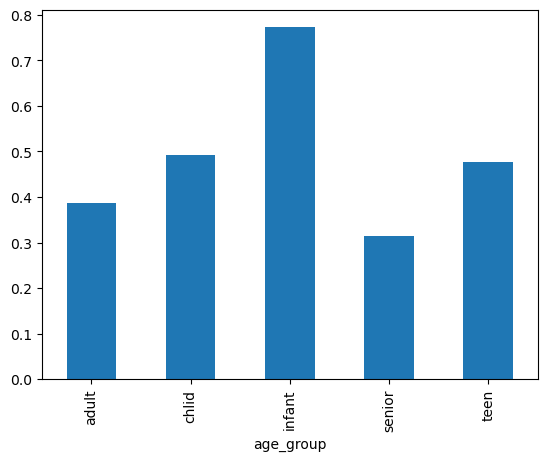

In [10]:
titanic.groupby("age_group")["survived"].mean().plot(kind = "bar")

In [12]:
df = titanic[["pclass", "survived", "fare"]]

In [13]:
df

,pclass,survived,fare
0,1,1,211.3375
1,1,1,151.5500
2,1,0,151.5500
3,1,0,151.5500
4,1,0,151.5500
...,...,...,...
1304,3,0,14.4542
1305,3,0,14.4542
1306,3,0,7.2250
1307,3,0,7.2250


In [16]:
def get_range(s):
    return s.max() - s.min()

In [17]:
df.apply(get_range)

pclass        2.0000
survived      1.0000
fare        512.3292
dtype: float64

In [18]:
df.apply(get_range, axis=1)

0       210.3375
1       150.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Length: 1309, dtype: float64

In [22]:
def get_family_size(s):
    family_size = s.sibsp + s.parch
    if family_size == 0:
        return "Solo Traveler"
    elif family_size < 5:
        return "Average"
    else:
        return "Large"

In [23]:
titanic.apply(get_family_size, axis = 1)

0       Solo Traveler
1             Average
2             Average
3             Average
4             Average
            ...      
1304          Average
1305          Average
1306    Solo Traveler
1307    Solo Traveler
1308    Solo Traveler
Length: 1309, dtype: object

In [25]:
titanic["pclass"]
# 1 = 1st
# 2 = 2nd
# 3 = 3rd

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [26]:
titanic["pclass"].map({1:"1st", 2:"2nd", 3:"3rd"})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [27]:
titanic["age"].map(lambda a: a < 18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [28]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",infant
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",chlid
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult
